In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
swi=0.2
soi=0.8
sor=0.25
visc_water=1
visc_oil=[10,50,100,500,5000]

rec=np.arange(0.01,0.51,step=0.01)

In [4]:
snorm=[]
sw_calc=[]
so_calc=[]
krw_calc=[]
kro_calc=[]
fw_calc_10=[]
fw_calc_50=[]
fw_calc_100=[]
fw_calc_500=[]
fw_calc_5000=[]

fw_arr=[fw_calc_10,fw_calc_50,fw_calc_100,fw_calc_500,fw_calc_5000]

for i in range(len(rec)) :
    
    so=soi-soi*rec[i]
    sw=1-so
    s_norm=(sw-swi)/(1-swi-sor)
    krw=s_norm**3
    kro=(1-s_norm)**3
    
    for j in range(5) :
            fw=1/(1+((kro*visc_water)/(krw*visc_oil[j])))
            fw_arr[j].append(fw)

    snorm.append(s_norm)
    sw_calc.append(sw)
    so_calc.append(so)
    kro_calc.append(kro)
    krw_calc.append(krw)
    

In [5]:
df=pd.DataFrame()

In [6]:
df['Recovery']=pd.Series(rec)
df['Oil Saturation']= pd.Series(so_calc)
df['Water Saturation']=pd.Series(sw_calc)
df['Normalized Water Saturation']=pd.Series(snorm)
df['Relative Water Permeability']=pd.Series(krw_calc)
df['Relative Oil Permeability']=pd.Series(kro_calc)
df['Fw at 10cp']=pd.Series(fw_calc_10)
df['Fw at 50cp']=pd.Series(fw_calc_50)
df['Fw at 100cp']=pd.Series(fw_calc_100)
df['Fw at 500cp']=pd.Series(fw_calc_500)
df['Fw at 5000cp']=pd.Series(fw_calc_5000)

In [7]:
fw_names=['Fw at 10cp', 'Fw at 50cp', 'Fw at 100cp','Fw at 500cp', 'Fw at 5000cp']
print(df.head(2))

   Recovery  Oil Saturation  Water Saturation  Normalized Water Saturation  \
0      0.01           0.792             0.208                     0.014545   
1      0.02           0.784             0.216                     0.029091   

   Relative Water Permeability  Relative Oil Permeability  Fw at 10cp  \
0                     0.000003                   0.956995    0.000032   
1                     0.000025                   0.915241    0.000269   

   Fw at 50cp  Fw at 100cp  Fw at 500cp  Fw at 5000cp  
0    0.000161     0.000321     0.001605      0.015824  
1    0.001343     0.002683     0.013271      0.118551  


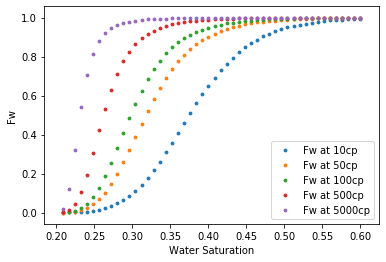

In [8]:
for item in fw_names :
    water=plt.scatter('Water Saturation' , item, data=df,s=8)
    plt.xlabel('Water Saturation')
    plt.ylabel('Fw')
    plt.legend()
    print(water)

for item in fw_names:  
    rec_plot = plt.plot( 'Recovery' , item,  data=df )
    plt.xlabel('Recovery')
    plt.ylabel('Fw')
    plt.legend()
    print(rec_plot)

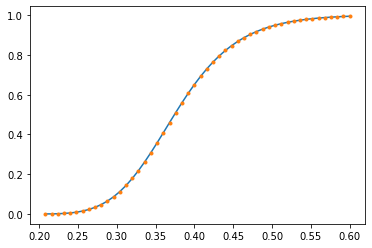

In [19]:
sat=df['Water Saturation']
fw_=df['Fw at 10cp']
poly=np.polyfit(sat,fw_,13)
func=np.poly1d(poly)
plt.plot(sat , func(sat) ,'-', sat,fw_,'.')

In [10]:
df.iloc[16:,6]

16    0.261720
17    0.308523
18    0.357753
19    0.408460
20    0.459642
21    0.510316
22    0.559589
23    0.606703
24    0.651068
25    0.692273
26    0.730074
27    0.764378
28    0.795214
29    0.822705
30    0.847042
31    0.868456
32    0.887200
33    0.903534
34    0.917714
35    0.929983
36    0.940569
37    0.949678
38    0.957498
39    0.964199
40    0.969927
41    0.974815
42    0.978977
43    0.982513
44    0.985512
45    0.988048
46    0.990187
47    0.991986
48    0.993495
49    0.994754
Name: Fw at 10cp, dtype: float64

In [11]:
import math
    
def trun(number, decimals=0):
    """
    Returns a value truncated to a specific number of decimal places.
    """
    if not isinstance(decimals, int):
        raise TypeError("decimal places must be an integer.")
    elif decimals < 0:
        raise ValueError("decimal places has to be 0 or more.")
    elif decimals == 0:
        return math.trunc(number)

    factor = 10.0 ** decimals
    return math.trunc(number * factor) / factor


In [12]:
def diffCheck(arr):
    ans=0
    for i in range(len(arr)-1):
        
        diff=trun(arr[i+1],3)-trun(arr[i],3)
        if diff<0.02:
            ans=i
        else :
            continue
    return ans

run_val=diffCheck(np.array(fw_))
print(run_val)

48


In [39]:
deriv=np.polyder(poly)
x_val=np.arange(0.0,max(sat),0.001)
y_val=np.polyval(poly,x_val)
der_val=np.polyval(deriv,x_val)

perc_acc=[]
fw_min=fw_[0]
sat_min=sat[0]
half=0
if(len(sat)%2==0):
    half=len(sat)/2
else :
    half=(len(sat)+1)/2
int_half = int(half)

for i in range(2 , len(x_val)) :
    y2=y_val[i]
    y1=fw_[0]
    x2=x_val[i]
    x1=sat[0]
    num=(y2-y1)
    den=(x2-x1)
    slope=num/den
    perc=(der_val[i]-slope)
    perc_acc.append(perc)


In [42]:
hh=pd.Series(perc_acc)

In [48]:
gg=hh[(hh>0)&(hh!=0.0020657999158894824)]i.0020657999158894824
min(gg)

0.0020657999158894824

In [47]:
print(gg[gg==min(gg)])

205    0.002066
dtype: float64


In [49]:
print(x_val[207])

0.20700000000000002
